<a href="https://colab.research.google.com/github/hyojk2001/Data-Analysis-Project/blob/main/prophet_timeseries_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

df = pd.read_csv('vgsales.csv')

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# 결측치
df = df.dropna(axis=0)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# year 행의 데이터를 문자에서 숫자로 변환
df = df.astype({'Year' : 'int'})

In [ ]:
# 1996년 이상의 데이터, 2020년 데이터 지우기
# df = df[df['Year'] >= 1996]
df = df.drop(df[df['Year'] == 2020].index)
df.Year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2017])

In [ ]:
## 북미에서 닌텐도, EA, 액티비전, 소니, 유비소프트의 장르별 연간 판매량 ##

In [ ]:
plt.figure(figsize=(10,5))

label = sorted(list(df.Year.unique()))

# 개발사 top5의 판매량
nin_sale = df[df['Publisher'] == 'Nintendo'].groupby('Year').NA_Sales.sum()
ea_sale = df[df['Publisher'] == 'Electronic Arts'].groupby('Year').NA_Sales.sum()
act_sale = df[df['Publisher'] == 'Activision'].groupby('Year').NA_Sales.sum()
sony_sale = df[df['Publisher'].str.contains('Sony Computer')].groupby('Year').NA_Sales.sum()
ubi_sale = df[df['Publisher'] == 'Ubisoft'].groupby('Year').NA_Sales.sum()

# plt.bar(label, list(nin_sale.values), color='r')
# plt.bar(label, ea_sale.values, color='o')
# plt.bar(label, list(act_sale.values), color='b')
# plt.bar(label, list(sony_sale.values), color='g')
# plt.bar(label, ubi_sale.values, color='y')
# plt.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
nin_sale
df[df['Publisher'] == 'Nintendo'].groupby('Year').NA_Sales.sum()
# print(len(sorted(list(df.Year.unique()))))

# print(len(nin_sale))
# list(nin_sale.values)
df.Year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2017])

In [ ]:
type(nin_sale)

pandas.core.series.Series

In [ ]:
df[df['Publisher'].str.contains('Sony')].Publisher.unique()

array(['Sony Computer Entertainment',
       'Sony Computer Entertainment Europe', 'Sony Online Entertainment',
       'Sony Computer Entertainment America', 'Sony Music Entertainment'],
      dtype=object)

In [ ]:
a = df[df['Publisher'].str.contains('Sony')]
len(a)

708

In [ ]:
len(df[df['Publisher'] == 'Sony Computer Entertainment'])

681

In [ ]:
nin_sale

Year
1983     2.32
1984    32.57
1985    32.48
1986     6.73
1987     5.13
1988    21.23
1989    39.81
1990    19.75
1991     6.95
1992    18.48
1993     9.53
1994    10.96
1995     6.70
1996    34.54
1997    15.80
1998    23.42
1999    34.18
2000    15.00
2001    23.84
2002    25.05
2003    20.15
2004    28.30
2005    45.05
2006    90.35
2007    42.77
2008    38.83
2009    53.15
2010    24.18
2011    20.24
2012    20.84
2013    19.00
2014    18.01
2015     9.25
2016     1.16
Name: NA_Sales, dtype: float64

In [ ]:
type(list(nin_sale.values))

list

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The numbers of games divided by Nintendo per Year in NA')

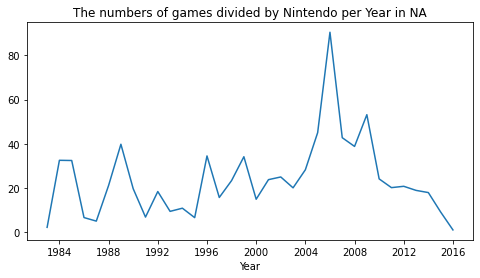

In [ ]:
plt.figure(figsize=(8,4))
# a = plt.plot(nin_sale)
nin_na = sns.lineplot(nin_sale.index, nin_sale.values)
nin_na.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.title('The numbers of games divided by Nintendo per Year in NA')

# plt.figure(figsize=(8,4))
# ea_na = sns.lineplot(ea_sale.index, ea_sale.values)
# ea_na.xaxis.set_major_locator(MaxNLocator(integer = True))
# plt.title('The numbers of games divided by EA per Year in NA')

# plt.figure(figsize=(8,4))
# act_na = sns.lineplot(act_sale.index, act_sale.values)
# act_na.xaxis.set_major_locator(MaxNLocator(integer = True))
# plt.title('The numbers of games divided by Activision per Year in NA')

# plt.figure(figsize=(8,4))
# sony_na = sns.lineplot(sony_sale.index, sony_sale.values)
# sony_na.xaxis.set_major_locator(MaxNLocator(integer = True))
# plt.title('The numbers of games divided by Sony per Year in NA')

# plt.figure(figsize=(8,4))
# ubi_na = sns.lineplot(ubi_sale.index, ubi_sale.values)
# ubi_na.xaxis.set_major_locator(MaxNLocator(integer = True))
# plt.title('The numbers of games divided by Ubisoft per Year in NA')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

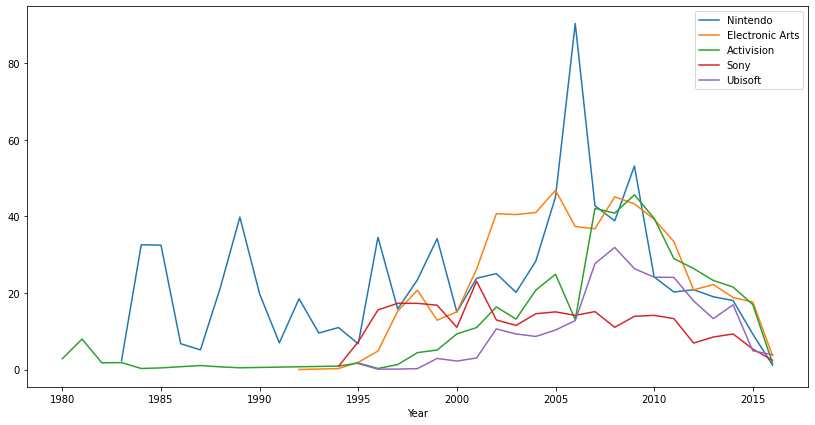

In [ ]:
# 북미 지역에서 top5 개발사 별 판매량 정리

df1 = df[df['Publisher'] == 'Nintendo'].groupby('Year').NA_Sales.sum()
df2 = df[df['Publisher'] == 'Electronic Arts'].groupby('Year').NA_Sales.sum()
df3 = df[df['Publisher'] == 'Activision'].groupby('Year').NA_Sales.sum()
df4 = df[df['Publisher'].str.contains('Sony')].groupby('Year').NA_Sales.sum()
df5 = df[df['Publisher'] == 'Ubisoft'].groupby('Year').NA_Sales.sum()

plt.figure(figsize=(14,7))

ax = sns.lineplot(df1.index, df1.values, label='Nintendo')
ax = sns.lineplot(df2.index, df2.values, label='Electronic Arts')
ax = sns.lineplot(df3.index, df3.values, label='Activision')
ax = sns.lineplot(df4.index, df4.values, label='Sony')
ax = sns.lineplot(df5.index, df5.values, label='Ubisoft')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Numbers of sales / Numbers of games per year')

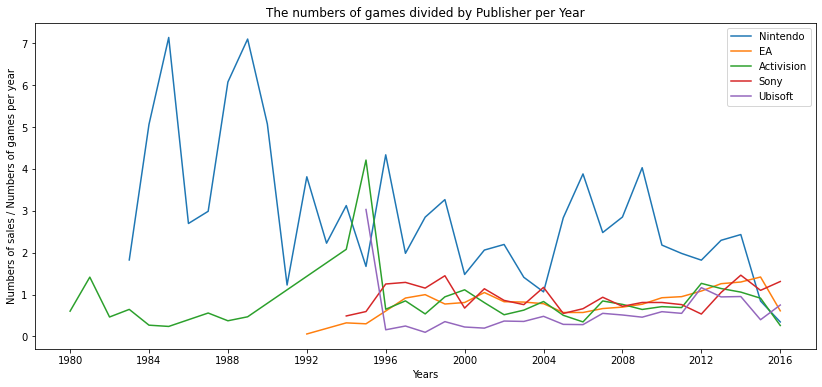

In [ ]:
# 가장 많은 게임 발매량 회사 TOP5의 각 연도별 게임 판매수

plt.figure(figsize= (14,6))

x_n=df[df['Publisher'] == 'Nintendo'].groupby("Year").Global_Sales.sum()
x_e=df[df['Publisher'] == 'Electronic Arts'].groupby("Year").Global_Sales.sum()
x_a=df[df['Publisher'] == 'Activision'].groupby("Year").Global_Sales.sum()
x_s=df[df['Publisher'] == 'Sony Computer Entertainment'].groupby("Year").Global_Sales.sum()
x_u=df[df['Publisher'] == 'Ubisoft'].groupby("Year").Global_Sales.sum()

# 각 회사별로 년도별 게임 개발 갯수
nin_sale = df[df['Publisher'] == 'Nintendo'].Year.value_counts()
ea_sale = df[df['Publisher'] == 'Electronic Arts'].Year.value_counts()
act_sale = df[df['Publisher'] == 'Activision'].Year.value_counts()
sony_sale = df[df['Publisher'] == 'Sony Computer Entertainment'].Year.value_counts()
ubi_sale = df[df['Publisher'] == 'Ubisoft'].Year.value_counts()

# 그 해의 해당게임사 총 판매량 / 그 해의 해당게임사 총 개발게임 갯수 
nintendo = x_n / nin_sale
ea = x_e / ea_sale
activision = x_a / act_sale
sony = x_s / sony_sale
ubisoft = x_u / ubi_sale

b = sns.lineplot(nintendo.index, nintendo.values, label='Nintendo')
b = sns.lineplot(ea.index, ea.values, label='EA')
b = sns.lineplot(activision.index, activision.values, label='Activision')
b = sns.lineplot(sony.index, sony.values, label='Sony')
b = sns.lineplot(ubisoft.index, ubisoft.values, label='Ubisoft')
b.xaxis.set_major_locator(MaxNLocator(integer = True))

plt.title('The numbers of games divided by Publisher per Year')
b.set_xlabel('Years')
b.set_ylabel('Numbers of sales / Numbers of games per year')

In [ ]:
######################################################

In [ ]:
len(df.groupby('Genre'))
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

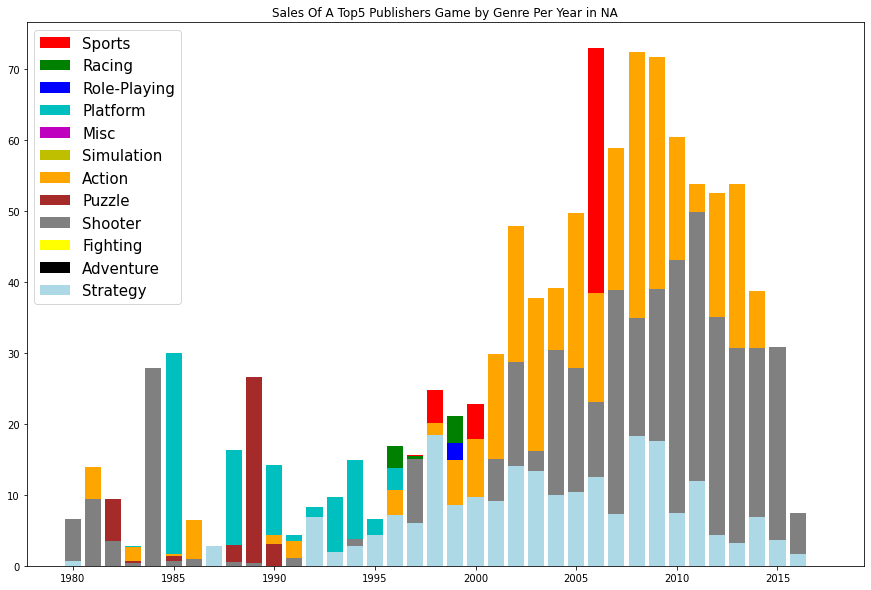

In [ ]:

plt.figure(figsize=(15,10))

a = df[(df['Genre'] == 'Sports')].groupby('Year').NA_Sales.sum()
b = df[(df['Genre'] == 'Racing')].groupby('Year').NA_Sales.sum()
c = df[(df['Genre'] == 'Role-Playing')].groupby('Year').NA_Sales.sum()
d = df[(df['Genre'] == 'Platform')].groupby('Year').NA_Sales.sum()
e = df[(df['Genre'] == 'Misc')].groupby('Year').NA_Sales.sum()
f = df[(df['Genre'] == 'Simulation')].groupby('Year').NA_Sales.sum()
g = df[(df['Genre'] == 'Action')].groupby('Year').NA_Sales.sum()
h = df[(df['Genre'] == 'Puzzle')].groupby('Year').NA_Sales.sum()
i = df[(df['Genre'] == 'Shooter')].groupby('Year').NA_Sales.sum()
j = df[(df['Genre'] == 'Fighting')].groupby('Year').NA_Sales.sum()
k = df[(df['Genre'] == 'Adventure')].groupby('Year').NA_Sales.sum()
l = df[(df['Genre'] == 'Strategy')].groupby('Year').NA_Sales.sum()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a1 = plt.bar(a.index, a.values, color='r')
b1 = plt.bar(b.index, b.values, color='g')
c1 = plt.bar(c.index, c.values, color='b')
d1 = plt.bar(d.index, d.values, color='c')
e1 = plt.bar(e.index, e.values, color='m')
f1 = plt.bar(f.index, f.values, color='y')
g1 = plt.bar(g.index, g.values, color='orange')
h1 = plt.bar(h.index, h.values, color='brown')
i1 = plt.bar(i.index, i.values, color='gray')
j1 = plt.bar(j.index, j.values, color='yellow')
k1 = plt.bar(j.index, j.values, color='black')
l1 = plt.bar(j.index, j.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Top5 Publishers Game by Genre Per Year in NA')
plt.show()

In [ ]:
## 북미에서 탑5 개발사들의 각 장르별 전체 판매량 / 평균 판매량 비교 ##
# 닌텐도 - 1, EA - 2, 액티비전 - 3, 소니 - 4, 유비소프트 - 5

## 북미에서 탑5 개발사들의 각 장르별 평균 판매량(장르별 전체 판매량 / 그 해에 개발된 각 장르별 게임 숫자) 비교 ##
# 닌텐도 - 11, EA - 22, 액티비전 - 33, 소니 - 44, 유비소프트 - 55

## 그림 그릴때는 변수 옆에 p를 붙인 거

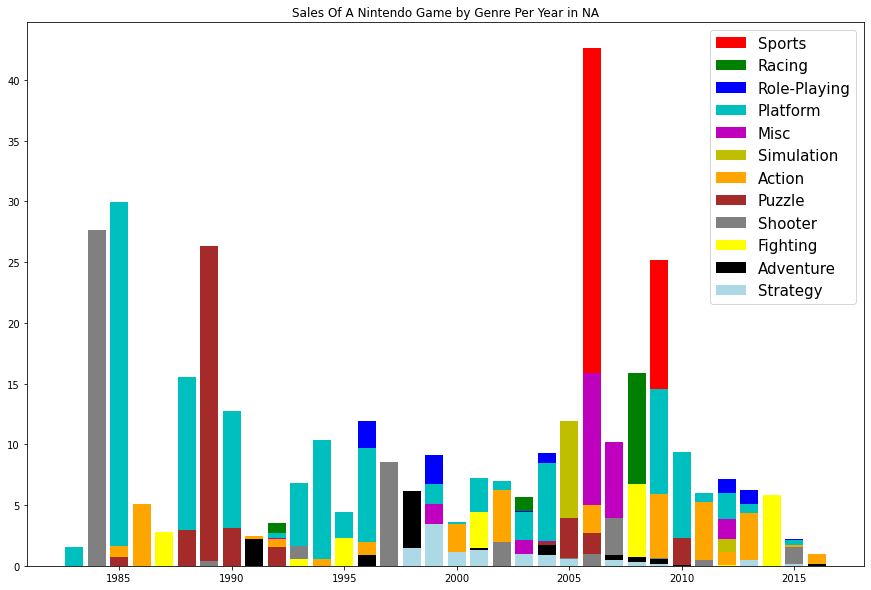

In [ ]:
# 북미에서 Nintendo 사가 각 해당 장르별로 판매한 비중 그래프(1)

plt.figure(figsize=(15,10))

a1 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
b1 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
c1 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
d1 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
e1 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
f1 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
g1 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
h1 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
i1 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
j1 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
k1 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
l1 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a1p = plt.bar(a1.index, a1.values, color='r')
b1p = plt.bar(b1.index, b1.values, color='g')
c1p = plt.bar(c1.index, c1.values, color='b')
d1p = plt.bar(d1.index, d1.values, color='c')
e1p = plt.bar(e1.index, e1.values, color='m')
f1p = plt.bar(f1.index, f1.values, color='y')
g1p = plt.bar(g1.index, g1.values, color='orange')
h1p = plt.bar(h1.index, h1.values, color='brown')
i1p = plt.bar(i1.index, i1.values, color='gray')
j1p = plt.bar(j1.index, j1.values, color='yellow')
k1p = plt.bar(l1.index, k1.values, color='black')
l1p = plt.bar(l1.index, l1.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Nintendo Game by Genre Per Year in NA')
plt.show()

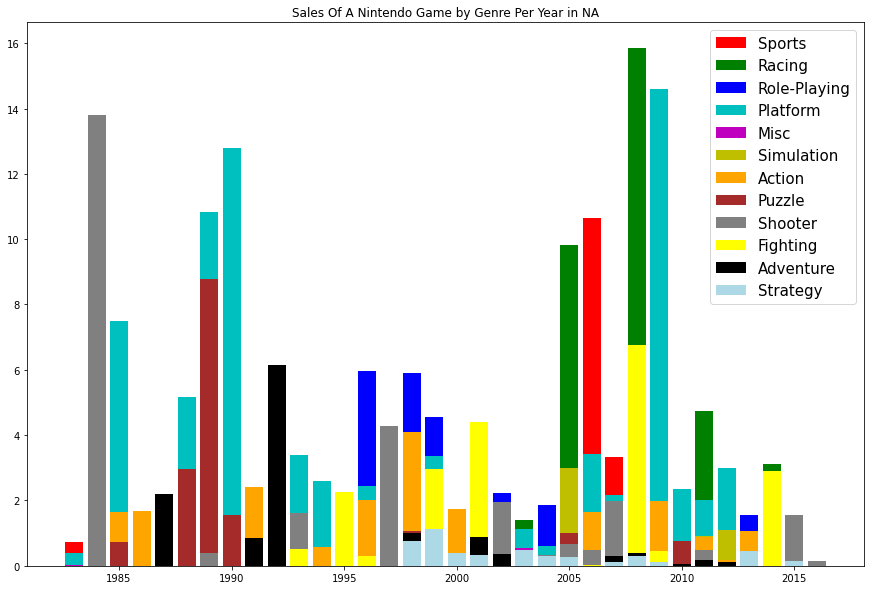

In [ ]:
# 북미에서 Nintendo 사가 각 장르별 게임 출시량 대비 판매량(11)

plt.figure(figsize=(15,10))

a11 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Sports') & (df['Publisher']=='Nintendo')].Year.value_counts()
b11 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Racing') & (df['Publisher']=='Nintendo')].Year.value_counts()
c11 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Role-Playing') & (df['Publisher']=='Nintendo')].Year.value_counts()
d11 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Platform') & (df['Publisher']=='Nintendo')].Year.value_counts()
e11 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Misc') & (df['Publisher']=='Nintendo')].Year.value_counts()
f11 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Simulation') & (df['Publisher']=='Nintendo')].Year.value_counts()
g11 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Action') & (df['Publisher']=='Nintendo')].Year.value_counts()
h11 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Puzzle') & (df['Publisher']=='Nintendo')].Year.value_counts()
i11 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Shooter') & (df['Publisher']=='Nintendo')].Year.value_counts()
j11 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Fighting') & (df['Publisher']=='Nintendo')].Year.value_counts()
k11 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Adventure') & (df['Publisher']=='Nintendo')].Year.value_counts()
l11 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Nintendo')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Strategy') & (df['Publisher']=='Nintendo')].Year.value_counts()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a11p = plt.bar(a11.index, a11.values, color='r')
b11p = plt.bar(b11.index, b11.values, color='g')
c11p = plt.bar(c11.index, c11.values, color='b')
d11p = plt.bar(d11.index, d11.values, color='c')
e11p = plt.bar(e11.index, e11.values, color='m')
f11p = plt.bar(f11.index, f11.values, color='y')
g11p = plt.bar(g11.index, g11.values, color='orange')
h11p = plt.bar(h11.index, h11.values, color='brown')
i11p = plt.bar(i11.index, i11.values, color='gray')
j11p = plt.bar(j11.index, j11.values, color='yellow')
k11p = plt.bar(k11.index, k11.values, color='black')
l11p = plt.bar(l11.index, l11.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Nintendo Game by Genre Per Year in NA')
plt.show()

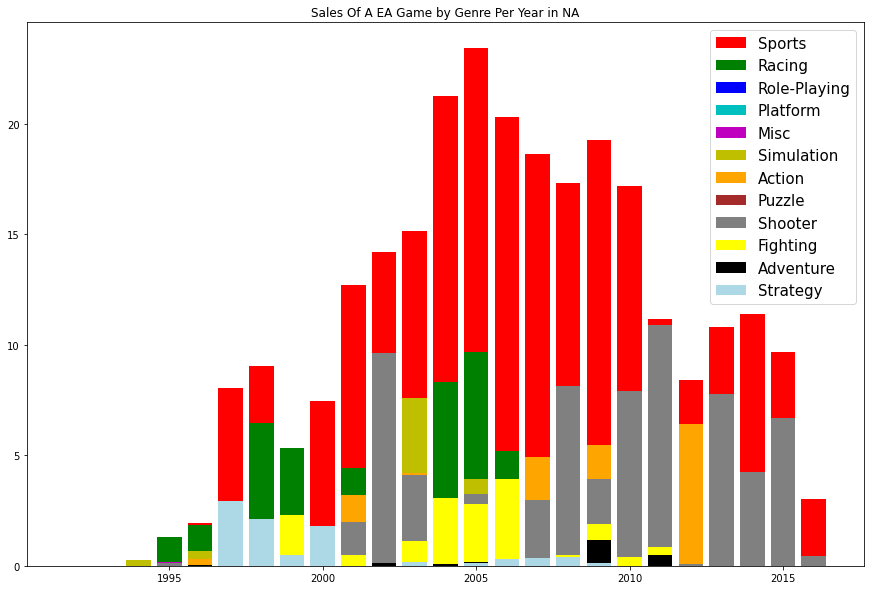

In [ ]:
# 북미에서 Electronic Arts 사가 각 해당 장르별로 판매한 비중 그래프

plt.figure(figsize=(15,10))

a2 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
b2 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
c2 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
d2 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
e2 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
f2 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
g2 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
h2 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
i2 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
j2 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
k2 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
l2 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a2p = plt.bar(a2.index, a2.values, color='r')
b2p = plt.bar(b2.index, b2.values, color='g')
c2p = plt.bar(c2.index, c2.values, color='b')
d2p = plt.bar(d2.index, d2.values, color='c')
e2p = plt.bar(e2.index, e2.values, color='m')
f2p = plt.bar(f2.index, f2.values, color='y')
g2p = plt.bar(g2.index, g2.values, color='orange')
h2p = plt.bar(h2.index, h2.values, color='brown')
i2p = plt.bar(i2.index, i2.values, color='gray')
j2p = plt.bar(j2.index, j2.values, color='yellow')
k2p = plt.bar(k2.index, k2.values, color='black')
l2p = plt.bar(l2.index, l2.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A EA Game by Genre Per Year in NA')
plt.show()

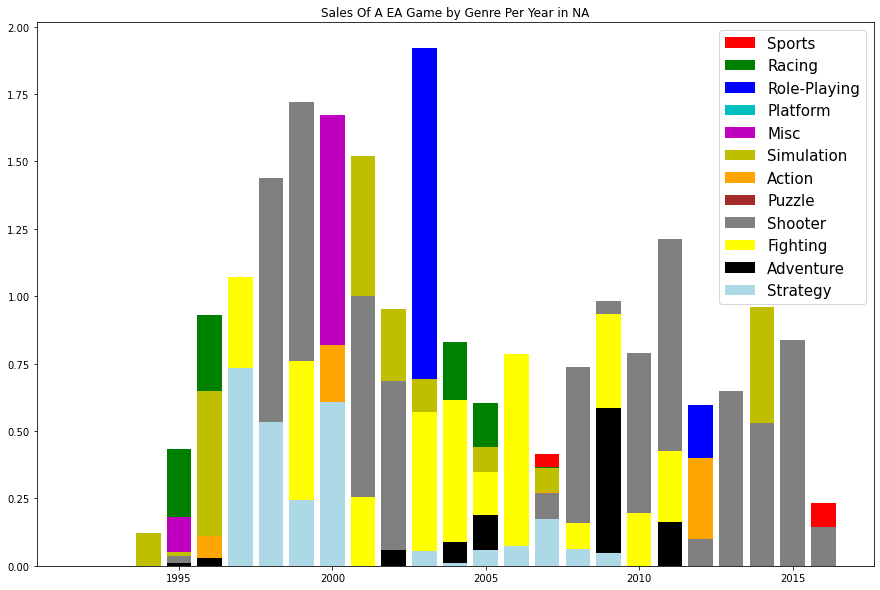

In [ ]:
# 북미에서 Electronic Arts 사가 각 장르별 게임 출시량 대비 판매량

plt.figure(figsize=(15,10))

a22 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Sports') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
b22 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Racing') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
c22 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Role-Playing') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
d22 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Platform') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
e22 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Misc') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
f22 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Simulation') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
g22 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Action') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
h22 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Puzzle') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
i22 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Shooter') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
j22 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Fighting') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
k22 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Adventure') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
l22 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Electronic Arts')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Strategy') & (df['Publisher']=='Electronic Arts')].Year.value_counts()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a22p = plt.bar(a22.index, a22.values, color='r')
b22p = plt.bar(b22.index, b22.values, color='g')
c22p = plt.bar(c22.index, c22.values, color='b')
d22p = plt.bar(d22.index, d22.values, color='c')
e22p = plt.bar(e22.index, e22.values, color='m')
f22p = plt.bar(f22.index, f22.values, color='y')
g22p = plt.bar(g22.index, g22.values, color='orange')
h22p = plt.bar(h22.index, h22.values, color='brown')
i22p = plt.bar(i22.index, i22.values, color='gray')
j22p = plt.bar(j22.index, j22.values, color='yellow')
k22p = plt.bar(k22.index, k22.values, color='black')
l22p = plt.bar(l22.index, l22.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A EA Game by Genre Per Year in NA')
plt.show()

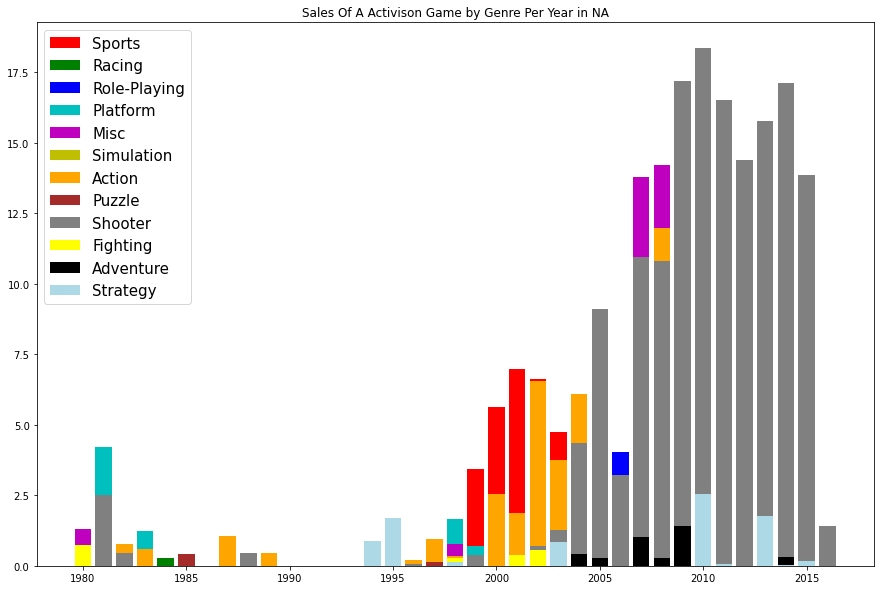

In [ ]:
# 북미에서 Activision 사가 각 해당 장르별로 판매한 비중 그래프

plt.figure(figsize=(15,10))

a3 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
b3 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
c3 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
d3 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
e3 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
f3 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
g3 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
h3 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
i3 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
j3 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
k3 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()
l3 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum()


a3p = plt.bar(a3.index, a3.values, color='r')
b3p = plt.bar(b3.index, b3.values, color='g')
c3p = plt.bar(c3.index, c3.values, color='b')
d3p = plt.bar(d3.index, d3.values, color='c')
e3p = plt.bar(e3.index, e3.values, color='m')
f3p = plt.bar(f3.index, f3.values, color='y')
g3p = plt.bar(g3.index, g3.values, color='orange')
h3p = plt.bar(h3.index, h3.values, color='brown')
i3p = plt.bar(i3.index, i3.values, color='gray')
j3p = plt.bar(j3.index, j3.values, color='yellow')
k3p = plt.bar(k3.index, k3.values, color='black')
l3p = plt.bar(l3.index, l3.values, color='lightblue')
# a3p.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Activison Game by Genre Per Year in NA')
plt.show()

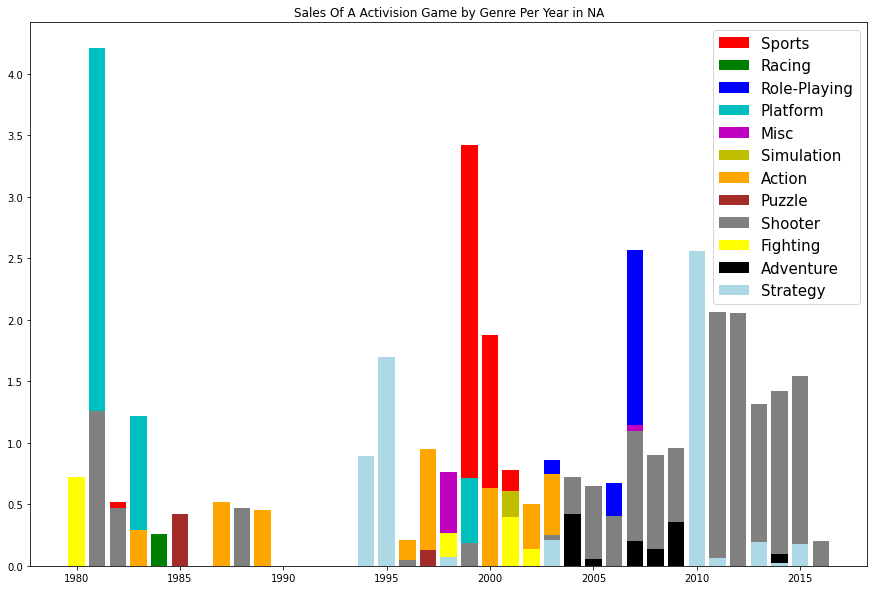

In [ ]:
# 북미에서 Activision 사가 각 장르별 게임 출시량 대비 판매량

plt.figure(figsize=(15,10))

a33 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Sports') & (df['Publisher']=='Activision')].Year.value_counts()
b33 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Racing') & (df['Publisher']=='Activision')].Year.value_counts()
c33 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Role-Playing') & (df['Publisher']=='Activision')].Year.value_counts()
d33 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Platform') & (df['Publisher']=='Activision')].Year.value_counts()
e33 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Misc') & (df['Publisher']=='Activision')].Year.value_counts()
f33 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Simulation') & (df['Publisher']=='Activision')].Year.value_counts()
g33 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Action') & (df['Publisher']=='Activision')].Year.value_counts()
h33 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Puzzle') & (df['Publisher']=='Activision')].Year.value_counts()
i33 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Shooter') & (df['Publisher']=='Activision')].Year.value_counts()
j33 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Fighting') & (df['Publisher']=='Activision')].Year.value_counts()
k33 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Adventure') & (df['Publisher']=='Activision')].Year.value_counts()
l33 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Activision')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Strategy') & (df['Publisher']=='Activision')].Year.value_counts()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a33p = plt.bar(a33.index, a33.values, color='r')
b33p = plt.bar(b33.index, b33.values, color='g')
c33p = plt.bar(c33.index, c33.values, color='b')
d33p = plt.bar(d33.index, d33.values, color='c')
e33p = plt.bar(e33.index, e33.values, color='m')
f33p = plt.bar(f33.index, f33.values, color='y')
g33p = plt.bar(g33.index, g33.values, color='orange')
h33p = plt.bar(h33.index, h33.values, color='brown')
i33p = plt.bar(i33.index, i33.values, color='gray')
j33p = plt.bar(j33.index, j33.values, color='yellow')
k33p = plt.bar(k33.index, k33.values, color='black')
l33p = plt.bar(l33.index, l33.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Activision Game by Genre Per Year in NA')
plt.show()

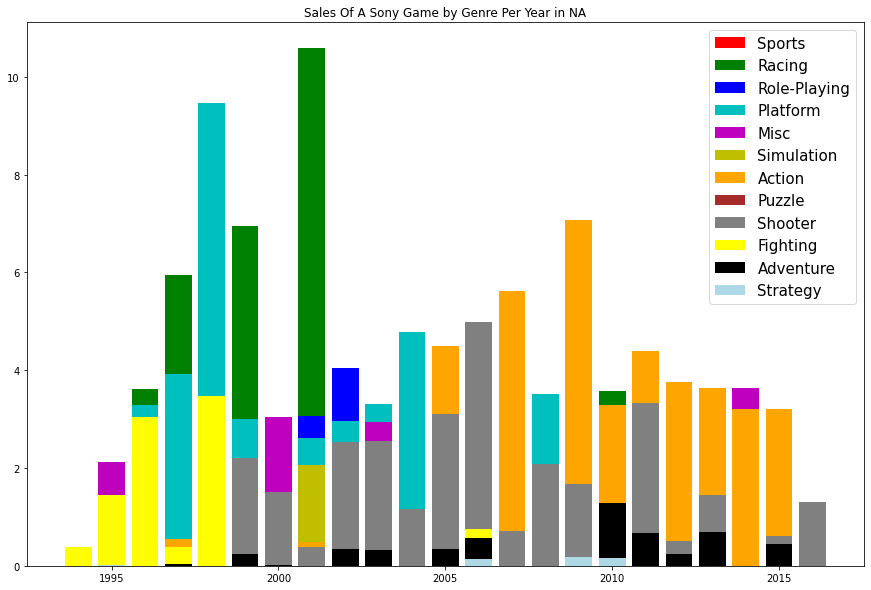

In [ ]:
# 북미에서 Sony 사가 각 해당 장르별로 판매한 비중 그래프

plt.figure(figsize=(15,10))

a4 = df[(df['Genre'] == 'Sports') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
b4 = df[(df['Genre'] == 'Racing') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
c4 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
d4 = df[(df['Genre'] == 'Platform') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
e4 = df[(df['Genre'] == 'Misc') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
f4 = df[(df['Genre'] == 'Simulation') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
g4 = df[(df['Genre'] == 'Action') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
h4 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
i4 = df[(df['Genre'] == 'Shooter') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
j4 = df[(df['Genre'] == 'Fighting') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
k4 = df[(df['Genre'] == 'Adventure') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
l4 = df[(df['Genre'] == 'Strategy') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum()
# plt.figure(figsize=(4p0,7))
# a4px = sns.lineplot()

a4p = plt.bar(a4.index, a4.values, color='r')
b4p = plt.bar(b4.index, b4.values, color='g')
c4p = plt.bar(c4.index, c4.values, color='b')
d4p = plt.bar(d4.index, d4.values, color='c')
e4p = plt.bar(e4.index, e4.values, color='m')
f4p = plt.bar(f4.index, f4.values, color='y')
g4p = plt.bar(g4.index, g4.values, color='orange')
h4p = plt.bar(h4.index, h4.values, color='brown')
i4p = plt.bar(i4.index, i4.values, color='gray')
j4p = plt.bar(j4.index, j4.values, color='yellow')
k4p = plt.bar(k4.index, k4.values, color='black')
l4p = plt.bar(l4.index, l4.values, color='lightblue')
# a4p.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Sony Game by Genre Per Year in NA')
plt.show()

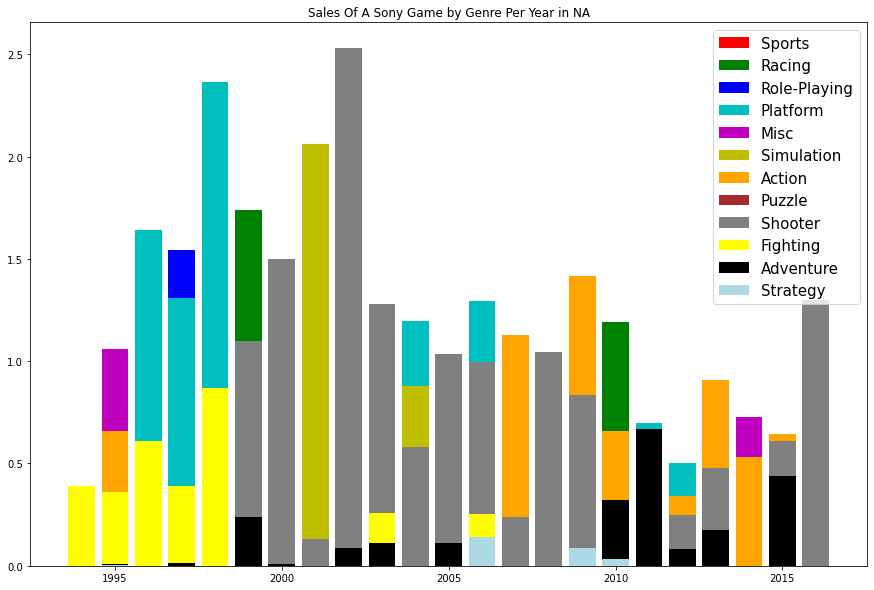

In [ ]:
# 북미에서 Sony 사가 각 장르별 게임 출시량 대비 판매량

plt.figure(figsize=(15,10))

a44 = df[(df['Genre'] == 'Sports') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Sports') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
b44 = df[(df['Genre'] == 'Racing') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Racing') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
c44 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Role-Playing') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
d44 = df[(df['Genre'] == 'Platform') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Platform') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
e44 = df[(df['Genre'] == 'Misc') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Misc') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
f44 = df[(df['Genre'] == 'Simulation') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Simulation') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
g44 = df[(df['Genre'] == 'Action') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Action') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
h44 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Puzzle') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
i44 = df[(df['Genre'] == 'Shooter') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Shooter') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
j44 = df[(df['Genre'] == 'Fighting') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Fighting') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
k44 = df[(df['Genre'] == 'Adventure') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Adventure') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
l44 = df[(df['Genre'] == 'Strategy') & (df['Publisher'].str.contains('Sony'))].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Strategy') & (df['Publisher'].str.contains('Sony'))].Year.value_counts()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a44p = plt.bar(a44.index, a44.values, color='r')
b44p = plt.bar(b44.index, b44.values, color='g')
c44p = plt.bar(c44.index, c44.values, color='b')
d44p = plt.bar(d44.index, d44.values, color='c')
e44p = plt.bar(e44.index, e44.values, color='m')
f44p = plt.bar(f44.index, f44.values, color='y')
g44p = plt.bar(g44.index, g44.values, color='orange')
h44p = plt.bar(h44.index, h44.values, color='brown')
i44p = plt.bar(i44.index, i44.values, color='gray')
j44p = plt.bar(j44.index, j44.values, color='yellow')
k44p = plt.bar(k44.index, k44.values, color='black')
l44p = plt.bar(l44.index, l44.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Sony Game by Genre Per Year in NA')
plt.show()

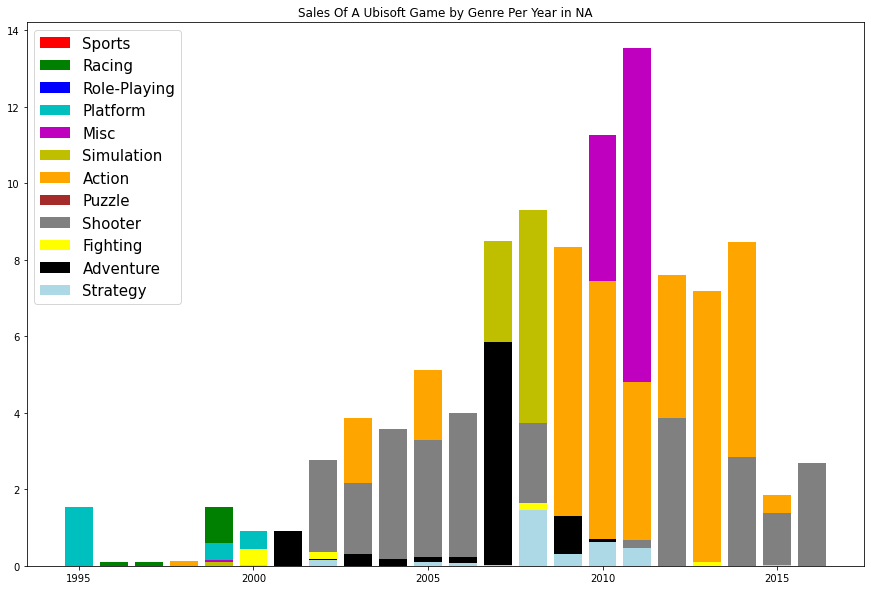

In [ ]:
# 북미에서'Ubisoft 사가 각 해당 장르별로 판매한 비중 그래프

plt.figure(figsize=(15,10))

a5 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
b5 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
c5 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
d5 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
e5 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
f5 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
g5 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
h5 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
i5 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
j5 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
k5 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
l5 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum()
# plt.figure(figsize=(5p0,7))
# a5px = sns.lineplot()

a5p = plt.bar(a5.index, a5.values, color='r')
b5p = plt.bar(b5.index, b5.values, color='g')
c5p = plt.bar(c5.index, c5.values, color='b')
d5p = plt.bar(d5.index, d5.values, color='c')
e5p = plt.bar(e5.index, e5.values, color='m')
f5p = plt.bar(f5.index, f5.values, color='y')
g5p = plt.bar(g5.index, g5.values, color='orange')
h5p = plt.bar(h5.index, h5.values, color='brown')
i5p = plt.bar(i5.index, i5.values, color='gray')
j5p = plt.bar(j5.index, j5.values, color='yellow')
k5p = plt.bar(k5.index, k5.values, color='black')
l5p = plt.bar(l5.index, l5.values, color='lightblue')
# a5p.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Ubisoft Game by Genre Per Year in NA')
plt.show()

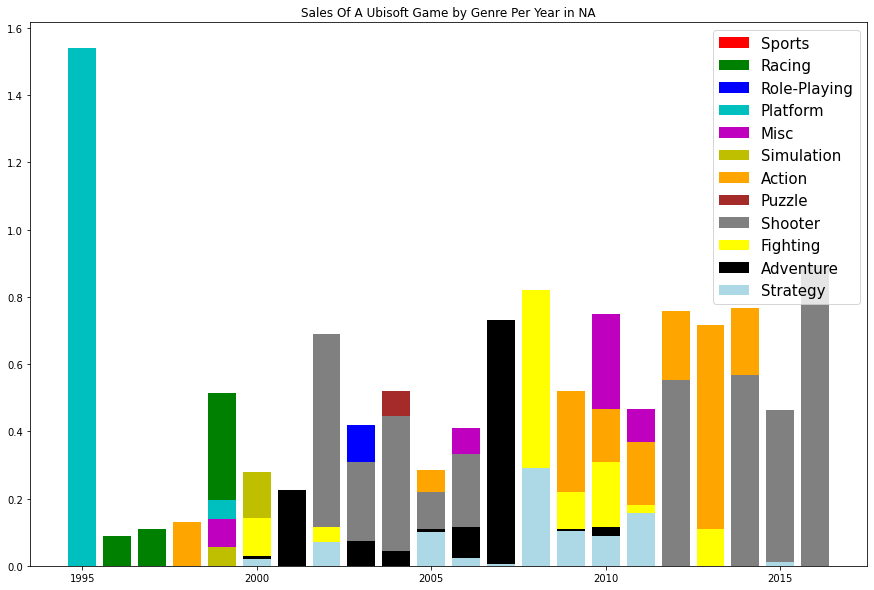

In [ ]:
# 북미에서 Ubisoft 사가 각 장르별 게임 출시량 대비 판매량

plt.figure(figsize=(15,10))

a55 = df[(df['Genre'] == 'Sports') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Sports') & (df['Publisher']=='Ubisoft')].Year.value_counts()
b55 = df[(df['Genre'] == 'Racing') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Racing') & (df['Publisher']=='Ubisoft')].Year.value_counts()
c55 = df[(df['Genre'] == 'Role-Playing') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Role-Playing') & (df['Publisher']=='Ubisoft')].Year.value_counts()
d55 = df[(df['Genre'] == 'Platform') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Platform') & (df['Publisher']=='Ubisoft')].Year.value_counts()
e55 = df[(df['Genre'] == 'Misc') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Misc') & (df['Publisher']=='Ubisoft')].Year.value_counts()
f55 = df[(df['Genre'] == 'Simulation') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Simulation') & (df['Publisher']=='Ubisoft')].Year.value_counts()
g55 = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Action') & (df['Publisher']=='Ubisoft')].Year.value_counts()
h55 = df[(df['Genre'] == 'Puzzle') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Puzzle') & (df['Publisher']=='Ubisoft')].Year.value_counts()
i55 = df[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Shooter') & (df['Publisher']=='Ubisoft')].Year.value_counts()
j55 = df[(df['Genre'] == 'Fighting') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Fighting') & (df['Publisher']=='Ubisoft')].Year.value_counts()
k55 = df[(df['Genre'] == 'Adventure') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Adventure') & (df['Publisher']=='Ubisoft')].Year.value_counts()
l55 = df[(df['Genre'] == 'Strategy') & (df['Publisher'] == 'Ubisoft')].groupby('Year').NA_Sales.sum() / df[(df['Genre'] == 'Strategy') & (df['Publisher']=='Ubisoft')].Year.value_counts()
# plt.figure(figsize=(10,7))
# a1x = sns.lineplot()

a55p = plt.bar(a55.index, a55.values, color='r')
b55p = plt.bar(b55.index, b55.values, color='g')
c55p = plt.bar(c55.index, c55.values, color='b')
d55p = plt.bar(d55.index, d55.values, color='c')
e55p = plt.bar(e55.index, e55.values, color='m')
f55p = plt.bar(f55.index, f55.values, color='y')
g55p = plt.bar(g55.index, g55.values, color='orange')
h55p = plt.bar(h55.index, h55.values, color='brown')
i55p = plt.bar(i55.index, i55.values, color='gray')
j55p = plt.bar(j55.index, j55.values, color='yellow')
k55p = plt.bar(k55.index, k55.values, color='black')
l55p = plt.bar(l55.index, l55.values, color='lightblue')
# a1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend(('Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'), fontsize=15)
plt.title('Sales Of A Ubisoft Game by Genre Per Year in NA')
plt.show()

In [ ]:
###################### 지금까지 만든 serial 데이터들을 dataframe으로 재결합 #####################
# nin, ea, act, sony, ubi + _all : 전체 판매량
# nin, ea, act, sony, ubi + _per : 단위 판매량

In [ ]:
nin_all = pd.concat([a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1], axis=1)
nin_all = nin_all.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
nin_all.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
nin_per = pd.concat([a11,b11,c11,d11,e11,f11,g11,h11,i11,j11,k11,l11], axis=1)
nin_per = nin_per.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
nin_per.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
ea_all = pd.concat([a2,b2,c2,d2,e2,f2,g2,h2,i2,j2,k2,l2], axis=1)
ea_all = ea_all.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
ea_all.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
ea_per = pd.concat([a22,b22,c22,d22,e22,f22,g22,h22,i22,j22,k22,l22], axis=1)
ea_per = ea_per.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
ea_per.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
act_all = pd.concat([a3,b3,c3,d3,e3,f3,g3,h3,i3,j3,k3,l3], axis=1)
act_all = act_all.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
act_all.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
act_per = pd.concat([a33,b33,c33,d33,e33,f33,g33,h33,i33,j33,k33,l33], axis=1)
act_per = act_per.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
act_per.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
sony_all = pd.concat([a4,b4,c4,d4,e4,f4,g4,h4,i4,j4,k4,l4], axis=1)
sony_all = sony_all.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
sony_all.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'sonyion', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
sony_per = pd.concat([a44,b44,c44,d44,e44,f44,g44,h44,i44,j44,k44,l44], axis=1)
sony_per = sony_per.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
sony_per.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'sonyion', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
ubi_all = pd.concat([a5,b5,c5,d5,e5,f5,g5,h5,i5,j5,k5,l5], axis=1)
ubi_all = ubi_all.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
ubi_all.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'ubiion', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
ubi_per = pd.concat([a55,b55,c55,d55,e55,f55,g55,h55,i55,j55,k55,l55], axis=1)
ubi_per = ubi_per.fillna(0)   # 결측치(NaN)을 0으로 바꾸기
ubi_per.columns = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'ubiion', 'Fighting', 'Adventure',
       'Strategy']

In [ ]:
nin_all

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Year,,,,,,,,,,,,
1983,0.73,0.00,0.00,1.58,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,1.70,2.04,0.00,0.00,0.00,0.00,0.80,0.42,27.61,0.00,0.00,0.00
1985,0.18,0.00,0.00,29.93,0.00,0.00,1.64,0.73,0.00,0.00,0.00,0.00
1986,0.00,1.13,0.00,0.53,0.00,0.00,5.07,0.00,0.00,0.00,0.00,0.00
1987,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.80,2.19,0.00
1988,1.27,1.47,0.00,15.52,0.00,0.00,0.00,2.97,0.00,0.00,0.00,0.00
1989,2.24,0.00,0.00,10.83,0.00,0.00,0.00,26.34,0.40,0.00,0.00,0.00
1990,0.28,3.10,0.00,12.78,0.00,0.46,0.00,3.13,0.00,0.00,0.00,0.00
1991,0.41,0.58,0.00,0.00,0.00,0.93,2.42,0.70,1.06,0.00,0.85,0.00


In [ ]:
nin_all.head()

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Year,,,,,,,,,,,,
1983,0.73,0.00,0.0,1.58,0.01,0.0,0.00,0.00,0.00,0.0,0.00,0.0
1984,1.70,2.04,0.0,0.00,0.00,0.0,0.80,0.42,27.61,0.0,0.00,0.0
1985,0.18,0.00,0.0,29.93,0.00,0.0,1.64,0.73,0.00,0.0,0.00,0.0
1986,0.00,1.13,0.0,0.53,0.00,0.0,5.07,0.00,0.00,0.0,0.00,0.0
1987,0.14,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2.8,2.19,0.0


In [ ]:
nin_all.columns

Index(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
      dtype='object')

In [ ]:
ze = nin_all.loc[(nin_all.index <= 2000)]
ze

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Year,,,,,,,,,,,,
1983,0.73,0.00,0.00,1.58,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,1.70,2.04,0.00,0.00,0.00,0.00,0.80,0.42,27.61,0.00,0.00,0.00
1985,0.18,0.00,0.00,29.93,0.00,0.00,1.64,0.73,0.00,0.00,0.00,0.00
1986,0.00,1.13,0.00,0.53,0.00,0.00,5.07,0.00,0.00,0.00,0.00,0.00
1987,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.80,2.19,0.00
1988,1.27,1.47,0.00,15.52,0.00,0.00,0.00,2.97,0.00,0.00,0.00,0.00
1989,2.24,0.00,0.00,10.83,0.00,0.00,0.00,26.34,0.40,0.00,0.00,0.00
1990,0.28,3.10,0.00,12.78,0.00,0.46,0.00,3.13,0.00,0.00,0.00,0.00
1991,0.41,0.58,0.00,0.00,0.00,0.93,2.42,0.70,1.06,0.00,0.85,0.00


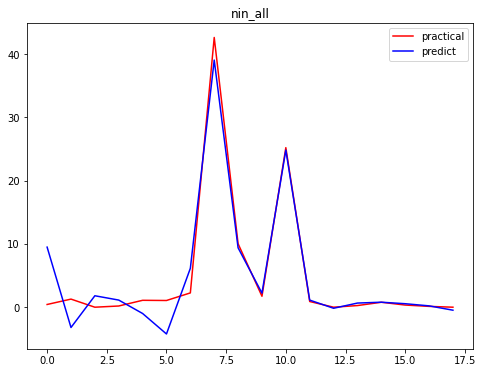

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 우선 닌텐도 총판매량을 기준으로 선형회귀분석 실시

# 데이터를 학습 / 테스트 전용으로 분리
train_sale = nin_all['Sports'].loc[(nin_all.index <= 2008)]
test_sale = nin_all['Sports'].loc[(nin_all.index >= 2009)]

# {(전체 년도 / 2) - 1}년간의 과거 데이터를 입력하면 다음날의 기온을 예측
# interval = 16  
interval = (len(nin_all) // 2) - 1

def make_nin_all(data):
  x = []  # 학습 데이터
  y = []  # 결과
  sale = list(nin_all['Sports'])
  for i in range(len(sale)):
    if i < interval: continue
    y.append(sale[i])
    xa = []
    for p in range(interval):
      d = i + p - interval
      xa.append(sale[d])
    x.append(xa)
  return (x,y)

train_x, train_y = make_nin_all(train_sale) 
test_x, test_y = make_nin_all(test_sale) 

# 직선 회귀 분석
lr = LinearRegression(normalize=True)
# 학습 단계
lr.fit(train_x, train_y) 
# 예측 단계
pre_y = lr.predict(test_x) 

# 그래프 그리기
plt.figure(figsize=(8,6))
line1, = plt.plot(test_y, c='r')
line2, = plt.plot(pre_y, c='b')
plt.legend(handles=(line1,line2), labels=('practical', 'predict'))
plt.title('nin_all')
plt.show()


In [ ]:
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

18
18
18
18


In [ ]:
pre_y

array([ 9.49240967, -3.20661921,  1.80794679,  1.1267578 , -0.99404721,
       -4.23001791,  6.14347336, 39.05000036,  9.3850437 ,  2.22263091,
       24.82430309,  1.12182219, -0.16805399,  0.65391227,  0.78993041,
        0.55125339,  0.21169842, -0.47244405])

In [ ]:
# 모델의 정확도 검증 - 대략 92%
print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

0.9213067530491897
0.9213067530491897


In [ ]:
# 모델의 정확도 검증 
print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

# 오차 평균, 최소/최대값
diff_y = abs(pre_y - test_y)
print('average=', sum(diff_y) / len(diff_y))  # 오차 평균
print('min=', min(diff_y))                    # 최소값
print('max=', max(diff_y))                    # 최대값

0.9213067530491897
0.9213067530491897
average= 1.9002039111516988
min= 0.009930405120550434
max= 9.062409667394448


In [ ]:
##########################################

In [ ]:
###########################################

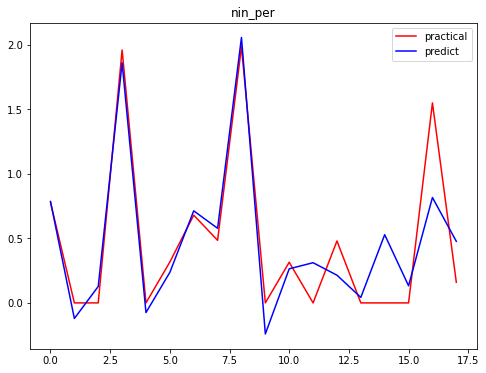

0.8405250760911557
0.8405250760911557


In [ ]:
train_sale = nin_per['Action'].loc[(nin_per.index <= 2008)]
test_sale = nin_per['Action'].loc[(nin_per.index >= 2009)]

# interval = len(train_sale) // 2 
interval = 16

def make_nin_per(data):
  x = []  # 학습 데이터
  y = []  # 결과
  sale = list(nin_per['Action'])
  for i in range(len(sale)):
    if i < interval: continue
    y.append(sale[i])
    xa = []
    for p in range(interval):
      d = i + p - interval
      xa.append(sale[d])
    x.append(xa)
  return (x,y)

train_x, train_y = make_nin_per(train_sale) 
test_x, test_y = make_nin_per(test_sale) 

# 직선 회귀 분석
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)  # 학습
pre_y = lr.predict(test_x)  # 예측

# 그래프 그리기
plt.figure(figsize=(8,6))
line1, = plt.plot(test_y, c='r')
line2, = plt.plot(pre_y, c='b')
plt.legend(handles=(line1,line2), labels=('practical', 'predict'))
plt.title('nin_per')
plt.show()

# 평균 
print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

In [ ]:
len(train_x)

18

In [ ]:
from matplotlib.ticker import MaxNLocator

In [ ]:
############################################

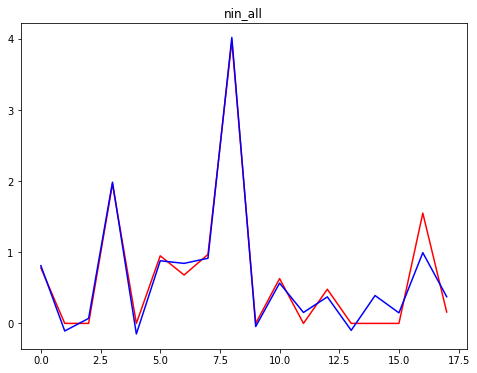

0.9621551857563486


In [ ]:
train_sale = nin_all['Action'].loc[(nin_all.index <= 2008)]
test_sale = nin_all['Action'].loc[(nin_all.index >= 2009)]

def make_nin_all(data):
  x = []  # 학습 데이터
  y = []  # 결과
  sale = list(nin_all['Action'])
  for i in range(len(sale)):
    if i < interval: continue
    y.append(sale[i])
    xa = []
    for p in range(interval):
      d = i + p - interval
      xa.append(sale[d])
    x.append(xa)
  return (x,y)

train_x, train_y = make_nin_all(train_sale) 
test_x, test_y = make_nin_all(test_sale) 

# 직선 회귀 분석
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)  # 학습
pre_y = lr.predict(test_x)  # 예측

# 그래프 그리기
plt.figure(figsize=(8,6))
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.title('nin_all')
# plt.axes.set_xlim(2002,2016)
plt.show()

print(lr.score(train_x, train_y))
# print(lr.score(test_x, test_y))

In [ ]:
print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

0.9621551857563486
0.9621551857563486


In [ ]:
len(ea_all)

24

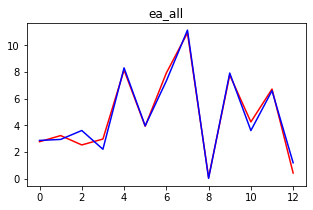

0.974094462953857
0.974094462953857
13
13
16
8


In [ ]:
interval = 11

train_sale = ea_all['Action'].loc[(ea_all.index <= 2008)]
test_sale = ea_all['Action'].loc[(ea_all.index >= 2009)]

def make_ea_all(data):
  x = []  # 학습 데이터
  y = []  # 결과
  sale = list(ea_all['Action'])
  for i in range(len(sale)):
    if i < interval: continue
    y.append(sale[i])
    xa = []
    for p in range(interval):
      d = i + p - interval
      xa.append(sale[d])
    x.append(xa)
  return (x,y)

train_x, train_y = make_ea_all(train_sale) 
test_x, test_y = make_ea_all(test_sale) 

# 직선 회귀 분석
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)  # 학습
pre_y = lr.predict(test_x)  # 예측

# 그래프 그리기
plt.figure(figsize=(5,3))
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.title('ea_all')
plt.show()

print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

print(len(train_x))
print(len(test_x))
print(len(train_sale))
print(len(test_sale))

In [ ]:
####################################################################

In [ ]:
####################################################################

In [ ]:
####################################################################

In [ ]:
####################################################################

In [ ]:
nin_all

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Year,,,,,,,,,,,,
1983,0.73,0.00,0.00,1.58,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,1.70,2.04,0.00,0.00,0.00,0.00,0.80,0.42,27.61,0.00,0.00,0.00
1985,0.18,0.00,0.00,29.93,0.00,0.00,1.64,0.73,0.00,0.00,0.00,0.00
1986,0.00,1.13,0.00,0.53,0.00,0.00,5.07,0.00,0.00,0.00,0.00,0.00
1987,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.80,2.19,0.00
1988,1.27,1.47,0.00,15.52,0.00,0.00,0.00,2.97,0.00,0.00,0.00,0.00
1989,2.24,0.00,0.00,10.83,0.00,0.00,0.00,26.34,0.40,0.00,0.00,0.00
1990,0.28,3.10,0.00,12.78,0.00,0.46,0.00,3.13,0.00,0.00,0.00,0.00
1991,0.41,0.58,0.00,0.00,0.00,0.93,2.42,0.70,1.06,0.00,0.85,0.00


In [ ]:
sorted(list(nin_all.index))[0]

1983

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##############################################################################################

In [ ]:
nin_all.columns

'Sports'

<Figure size 432x288 with 0 Axes>

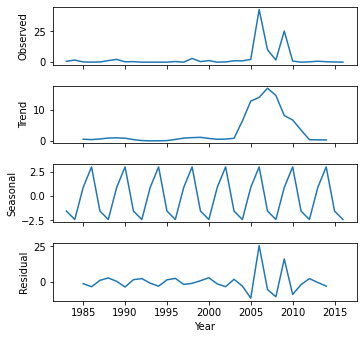

In [ ]:
# result = seasonal_decompose(nin_all['Sports'], model='additive', freq=4)
result = seasonal_decompose(nin_all['Sports'], model='Multiplicative', freq=4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(5,5)

In [ ]:
########################################################################################################

Text(0.5, 1.0, 'Nintendo All Sports')

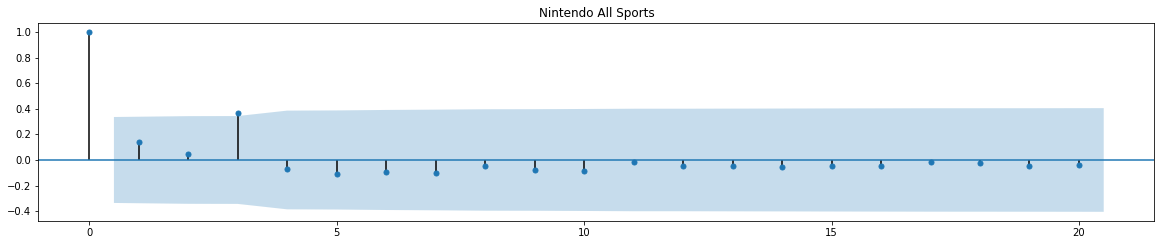

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(nin_all['Sports'], lags=20, ax=ax1)
ax1.set_title('Nintendo All ' + nin_all.columns[0])

# 1-2, 4-5번째를 제외하곤 값이 아주 천천히 커지거나 작아지는 것을 확인할 수 있다.
# 결국 ACF 값이 0으로 점진적으로 이르고 있음을 알 수 있다.

In [ ]:
########################################################################################################

In [ ]:
# ADF 검정으로 nin_all 테이블의 'Sports' 컬럼 데이터 정상성 확인
# 검정 가설
# 귀무가설 : 자료에 단위근이 존재, 즉 정상성을 만족하지 않음(p-value >= 0.05)
# 대립가설 : 자료가 정상성 만족(p-value < 0.05)


from statsmodels.tsa.stattools import adfuller

result = adfuller(nin_all['Sports'])
print('ADF statistics = %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# p-value가 0.05 보다 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있으므로 해당 데이터는 정상성을 만족한다

ADF statistics = -4.821547
p-value: 0.000049
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


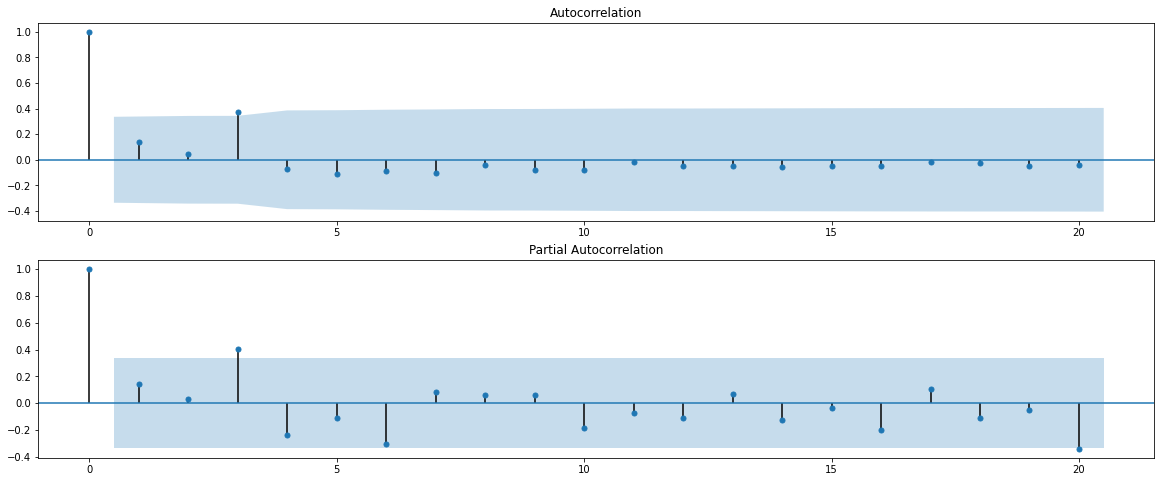

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(nin_all['Sports'], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(nin_all['Sports'], lags=20, ax=ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


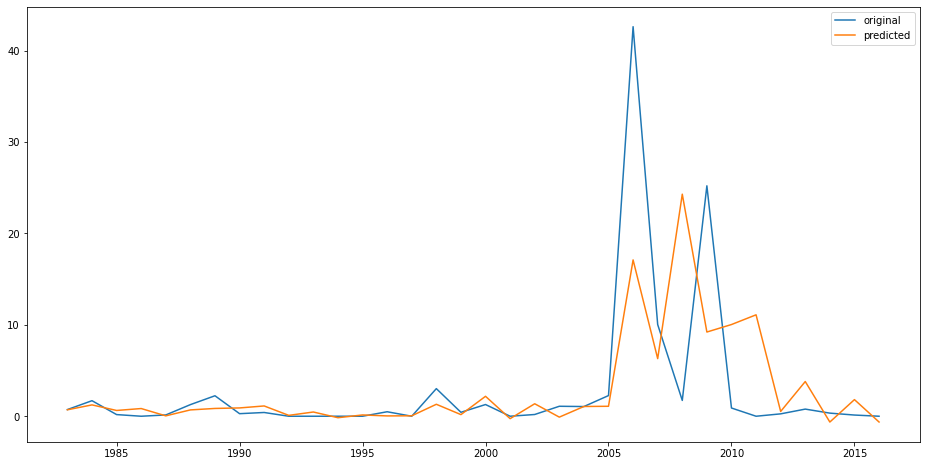

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(nin_all['Sports'], order=(2,1,2))
model_fit = model.fit(disp=0)

start_index = 1
end_index = 34
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
# forecast = model_fit.predict(start=start_index, end=end_index, typ='linear')

plt.figure(figsize=(16,8))
# plt.plot(nin_all.index, nin_all['Sports'], label='original')
plt.plot(nin_all['Sports'], label='original')
plt.plot(forecast.index+1983,forecast.values, label='predicted')    # 인덱스의 보정
plt.legend()
plt.show()

In [ ]:
forecast.index+1983

RangeIndex(start=1983, stop=2017, step=1)

In [ ]:
##########################################################
##########################################################
##########################################################

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(nin_all['Sports'], order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Sports   No. Observations:                   33
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -116.075
Method:                       css-mle   S.D. of innovations              8.028
Date:                Sat, 07 Aug 2021   AIC                            244.149
Time:                        08:40:39   BIC                            253.128
Sample:                             1   HQIC                           247.170
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0252      0.595     -0.042      0.966      -1.191       1.140
ar.L1.D.Sports    -0.9073      0.249     -3.650      0.001      -1.394      -0.420
ar.L2.D.Sports    -0.4321      0.267

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
nin_all.index

Int64Index([1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

In [ ]:
nin_all.Sports.values[-5:]

array([0.26, 0.78, 0.34, 0.13, 0.  ])

In [ ]:
nin_all.index

Int64Index([1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

In [ ]:
from fbprophet import Prophet

a = pd.DataFrame(nin_all.index)
b = pd.DataFrame(nin_all.Sports)
b = b.set_index(a.index)
a = pd.concat([a,b],axis=1)
a.columns = ['ds','y']


prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
# prophet = Prophet(growth='logistic')

prophet.fit(a)

future_data = prophet.make_future_dataframe(periods=10, freq='y')
forecast_data = prophet.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
34,1970-12-31 00:00:00.000002016,-774.095460,-774.272775,-773.922204
35,1971-12-31 00:00:00.000002016,29.849941,29.666129,30.035288
36,1972-12-31 00:00:00.000002016,-25.572499,-25.755492,-25.386513
37,1973-12-31 00:00:00.000002016,10.849713,10.679268,11.030355
38,1974-12-31 00:00:00.000002016,20.560870,20.376746,20.723423
39,1975-12-31 00:00:00.000002016,-1.978639,-2.188584,-1.798979
40,1976-12-31 00:00:00.000002016,-2.867384,-3.049061,-2.690231
41,1977-12-31 00:00:00.000002016,24.327636,24.144421,24.513824
42,1978-12-31 00:00:00.000002016,-1.862785,-2.041313,-1.693226
43,1979-12-31 00:00:00.000002016,11.120224,10.951409,11.301824


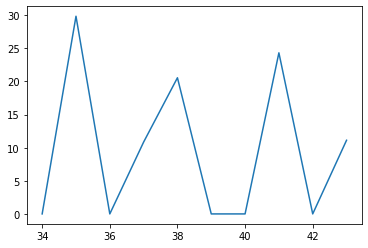

In [ ]:
forecast_data.loc[forecast_data['yhat'] < 0, 'yhat'] = 0
forecast_data.loc[forecast_data['yhat_lower'] < 0, 'yhat_lower'] = 0
forecast_data.loc[forecast_data['yhat_upper'] < 0, 'yhat_upper'] = 0
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
plt.plot(forecast_data.yhat.tail(10))

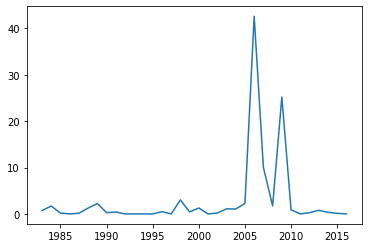

In [ ]:
plt.plot(nin_all.Sports)

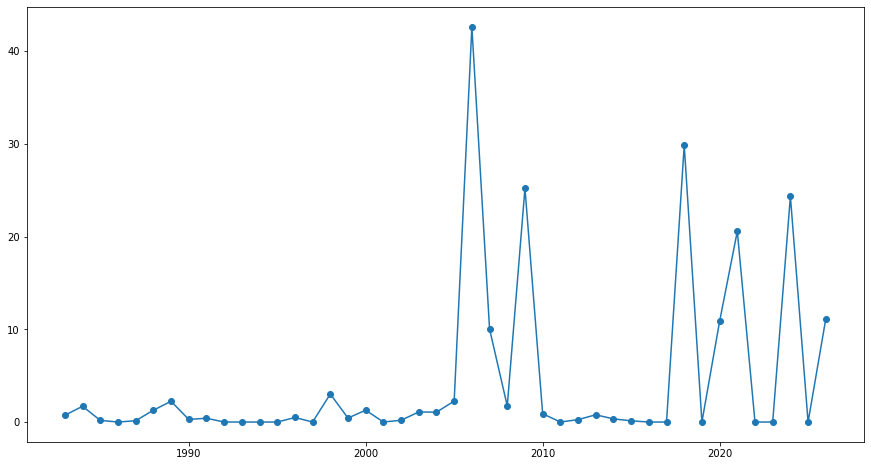

In [ ]:
c = forecast_data.yhat
# c.index = c.index - 204

d = pd.concat([nin_all.Sports, c.tail(10)])
plt.figure(figsize = (15,8))
plt.plot(d, marker='o')

In [ ]:
#####################################

In [ ]:
# 페이스북에서 만든 시계열 예측 라이브러리인 fbprophet 사용해서 미래 10년간 전체/평균 판매량 예측

from fbprophet import Prophet

prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(nin_all.Sports)

In [ ]:
#################################################
#################################################
#################################################

In [ ]:
c.index

RangeIndex(start=1983, stop=2027, step=1)